# Analyzing Online News Popularity Data
### *Author: Brett Dale*

# Table of contents
1. [Introduction](#introduction)
2. [Goal](#goal)
3. [Plotting and Analyzing the Data](#plotting)
4. [Training and Testing](#t&t)
5. [Residuals of Linear Model](#residuals_linear)
6. [Cubic Model](#alt_model)
7. [Cubic Model Residuals](#cubic_residuals)
8. [Reflection](#reflection)
9. [Three Things I Learned](#three_things)
10. [Three Questions](#questions)
11. [References](#references)

## Introduction <a name="introduction"></a>

The Online News Popularity data set captures statistics from articles posted on Mashable's website (www.mashable.com)

The data set includes 61 features, with the features being things such as each article's published date, average length of words in the article, number of links used in article, etc.

I chose this data set because this one stuck out to me as the most interesting one to study.
The internet is a crucial part of today's society and manipulating data on online news articles seems like a relevant study.

## Goal <a name="goal"></a>

The target I am hoping to predict with this data set is the amount of shares an article received.

There are many different features that have been recorded and I plan to find a high correlation between one of these features and the shares articles receive.

## Plotting and Analyzing the Data <a name="plotting"></a>

In [59]:
import pandas as pd
entire_news_df = pd.read_csv("OnlineNewsPopularity/OnlineNewsPopularity.csv", dtype={'url': str, 'timedelta': float, 'n_tokens_content' : float, 'shares': float}, sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

<AxesSubplot:>

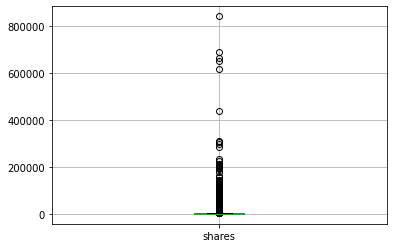

In [60]:
entire_news_df.boxplot(column="shares")

The above plot is a boxplot of the shares (our target to predict).
This boxplot shows that this data set has some strong outliers toward the higher end.

Having strong outliers toward the higher end of the data set is skewing the data, so dropping those outliers would help us model our data more accurately.

In [61]:
entire_news_df = entire_news_df.sort_values(by="shares", ascending=False)
news_df = entire_news_df.copy(deep=True)

<AxesSubplot:>

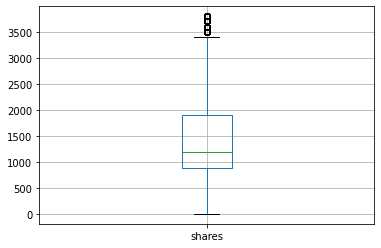

In [62]:
news_df.drop(entire_news_df.head(7000).index, inplace=True)
news_df.boxplot(column="shares")

This looks much more like a boxplot compared to the previous one.

The mean of shares among articles is hovering close to 1200. The higher-50% of shares among articles has a much wider range compared to the lower-50%.

## Training and Testing <a name="t&t"></a>

The training and testing process involves taking a random portion of the overall data (will be 70% in this case) and using that data to train our model.

Once our model is trained on the training data, we will test our model on the testing data (the remaining 30% in this case).

In [63]:
from sklearn.model_selection import train_test_split
y = news_df['shares']
x = news_df['n_tokens_content']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

In [64]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [65]:
lm.score(x_train.values.reshape(-1, 1), y_train)

0.002237457730729364

In [66]:
lm.score(x_test.values.reshape(-1, 1), y_test)

0.002768400938177873

With the information we just gathered, we can see our Linear model scored very low on the testing data with (0.001647618300696041)

## Residuals of Linear Model <a name="residuals_linear"></a>

Residuals are the difference between a data point and the regression line on the graph. Basically, it's the distance between the data point and the regression line.

In [67]:
import matplotlib.pyplot as plt
x_at_10 = x_train.loc[10]
x_at_10 = x_at_10.reshape(-1, 1)
x_train = x_train.values.reshape(-1, 1)
lm_residuals = y_train - lm.predict(x_train)

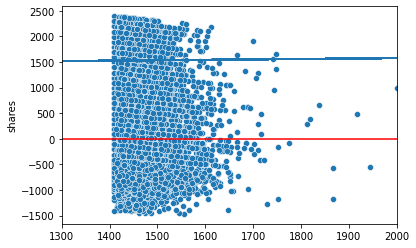

In [68]:
import seaborn as sns
sns.scatterplot(x=lm.predict(x_train), y=lm_residuals, )
plt.axhline(y = 0, color = 'red', label = 'y = 0')
# plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000])
plt.xlim(1300, 2000)
plt.plot(x_train, lm.predict(x_train))

Based of the information we have just gathered, the linear model does not fit at all. The low scores on the testing data and the strong underfitting give reason to believe this model is not a great representation of the data.

## Cubic Model <a name="alt_model"></a>

We are going to test another model and perform the same steps we did with the Linear model

I am choosing to try a cubic model. Cubic models give more flexibility to fit data and I believe a cubic model will fit better than the linear model did.

In [69]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [70]:
lm = LinearRegression()
cubic_reg = PolynomialFeatures(degree=3, include_bias=False)

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)
cubic_pipeline = make_pipeline(cubic_reg, lm)
cubic_pipeline.fit(x_train.values.reshape(-1, 1), y_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

In [72]:
cubic_pipeline.score(x_test.values.reshape(-1, 1), y_test)

0.0008311164123434578

In [73]:
cubic_pipeline.score(x_train.values.reshape(-1, 1), y_train)

0.003591622661415217

## Cubic Model Residuals <a name="cubic_residuals"></a>

Now that we have our pipeline built and collected the scores, we can start getting residual data

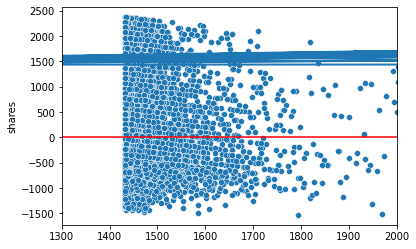

In [74]:
cubic_residuals = y_train - cubic_pipeline.predict(x_train.values.reshape(-1, 1))
sns.scatterplot(x=cubic_pipeline.predict(x_train.values.reshape(-1, 1)), y=cubic_residuals, )
plt.axhline(y = 0, color = 'red', label = 'y = 0')
plt.xlim(1300, 2000)
plt.plot(x_train.values.reshape(-1, 1), cubic_pipeline.predict(x_train.values.reshape(-1, 1)))

Based off the information we now have for our cubic pipeline, this model is not great for the data set either.
The scores for both training and testing data were very low and the residual data is well off the regression line.

## Reflection <a name="reflection"></a>

During this project, I was unable to find a relatively good model to predict the number of shares on an article.
None of the models I put together came close to fitting the data. Therefore, I would not suggest using these models to predict the shares an article will receive.

## Three Things I Learned <a name="three_things"></a>

1. I learned that you can not make a pipeline with PolynomialFeature and SelectKBest. There is no regression to perform

2. I strengthened my ability to interpret scores, and my knowledge on the purpose of splitting the data into training and testing data

3. I strengthened my ability to create and understand the importance of residuals.

## Three Good Questions <a name="questions"></a>

1. Why is LinearRegression used so widespread? I've noticed most examples include using LinearRegression in some way or form to plot data

2. How would I include features that are more true-false rather than statistical? An example is in this data set, we had features that were true-false such as 'data_channel_is_business'

3. What are some things I can notice early on in the project to help me get better scores on my models? To put it in other words; What do I look for to know what kind of model to form?

## References <a name="references"></a>

Residual information - https://www.statisticshowto.com/residual/#:~:text=A%20residual%20is%20the%20vertical,are%20below%20the%20regression%20line.&text=In%20other%20words%2C%20the%20residual,explained%20by%20the%20regression%20line.

Linear Regression information - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

